**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA2 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA2 </font>**

## Scenario:

This CA consists of 2 parts. Neural Networks and Semantic analysis.

<font size = 4> <b><u> Neural Networks </u></b></font>

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame.
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.


<font size = 4> <b><u> Semantic Analysis </u></b></font>

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

<font size = 4> <b><u> Requirements </u></b></font>

- Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you. [0-30]
- Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm. [0-40]
- Make a Prediction of a new customers income, who is not available in the original dataset. [0-5]
- Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]
- Visualize your sentiment analysis showing the positive, neutral, negative sentiment expressed. [0-5]

# Part 1: Neural Networks

### • Install the necessary libraries

In [1]:
!pip install tensorflow

### • Import necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### • Data Loading and Exploration

Predicting Customer Income using Neural Networks

In [54]:
# Load the dataset
df = pd.read_csv('BankRecords.csv')

In [55]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [56]:
# Rename the columns for clarity
df.rename(columns = {'Income(Thousands\'s)': 'Income(Thousands)'}, inplace = True)

#### • Data Exploration Let's explore the dataset to understand its structure and identify any potential issues.

In [57]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands)      5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [58]:
# Summary statistics of the dataset
df.describe()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [59]:
# Check for missing values
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

#### • Data Preprocessing We'll handle missing values, encode categorical variables, and normalize the data.

In [60]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

In [61]:
# Define feature columns and target column
feature_columns = df.columns.difference(['Income(Thousands)'])
target_column = 'Income(Thousands)'

In [62]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [63]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [64]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [65]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [71]:
# Scaling the dataset 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### • Neural Network Model

In [73]:
from tensorflow.keras.layers import Dropout

# Build the neural network with dropout regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [74]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [76]:
# Train the model - 100 epochs and validation_step at 0.2
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_split = 0.2, 
    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 956.1245 - val_loss: 787.4791
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 987.5771 - val_loss: 819.3876
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 971.3638 - val_loss: 750.2076
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 948.9128 - val_loss: 789.4171
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 927.6794 - val_loss: 810.5814
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 922.4357 - val_loss: 810.5287
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 956.9287 - val_loss: 798.2678
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 958.4804 - val_loss: 774.3245
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 973.5899 - val_loss: 797.1342
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 927.0276 - val_loss: 798.8098
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1013.4224 - val_loss: 811.9

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 926.2478 - val_loss: 866.8214
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 920.1653 - val_loss: 829.8113
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 840.6380 - val_loss: 827.9250
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 913.9778 - val_loss: 819.9916
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 883.3689 - val_loss: 807.0807
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 891.8270 - val_loss: 815.6838
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 848.4509 - val_loss: 846.0963
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 879.1946 - val_loss: 862.1534
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 904.1898 - val_loss: 851.5014
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 853.7570 - val_loss: 907.2237
Epoch 76/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 923.0030 - val_loss: 860.3858
E

In [77]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1028.1122
Test Loss: 937.4569091796875


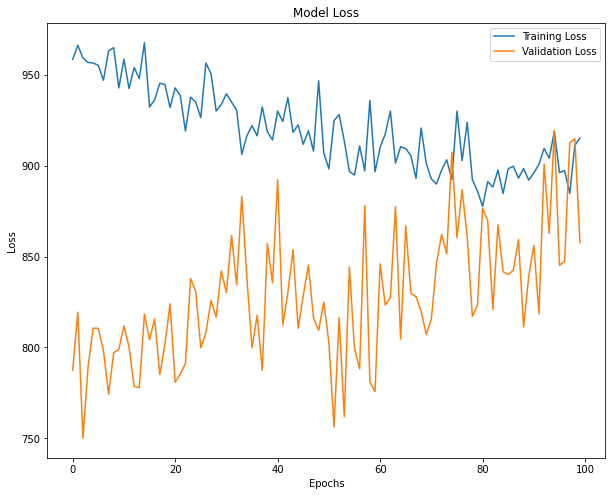

In [80]:
# Plot training history
plt.figure(figsize = (10, 8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()